In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Importing the dataset
df_raw = pd.read_excel('Overview_coding_INC2_-_Members.xlsx')
#drop first 3 rows and Argentina row
dataset = df_raw.drop([0,1,2,3,5]).reset_index(drop=True)
#drop last row
dataset = dataset.drop([len(dataset)-1]).reset_index(drop=True)
# make first row the header
dataset.columns = df_raw.iloc[3]

C:\Users\lkiel\Anaconda3\envs\ClusteringTara\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [58]:
# Only take economic columns
dataset_economic = dataset.iloc[:,[0,4,5,6,7,8,9,10]]
# Replace nan with 0
dataset_economic = dataset_economic.fillna(0)
# replace x with 1
dataset_economic = dataset_economic.replace('x',1)

In [68]:
vectors = dataset_economic.iloc[:,1:].values
countries = dataset_economic.iloc[:,0].values

In [60]:
# manhattan distance
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

1

In [83]:
manhattan_distance(vectors[66-6],vectors[47-6])

3

'Norway'

In [84]:
vectors[66-6]

array([0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [80]:
vectors[47-6]

array([1, 1, 0, 0, 0, 1, 1], dtype=int64)

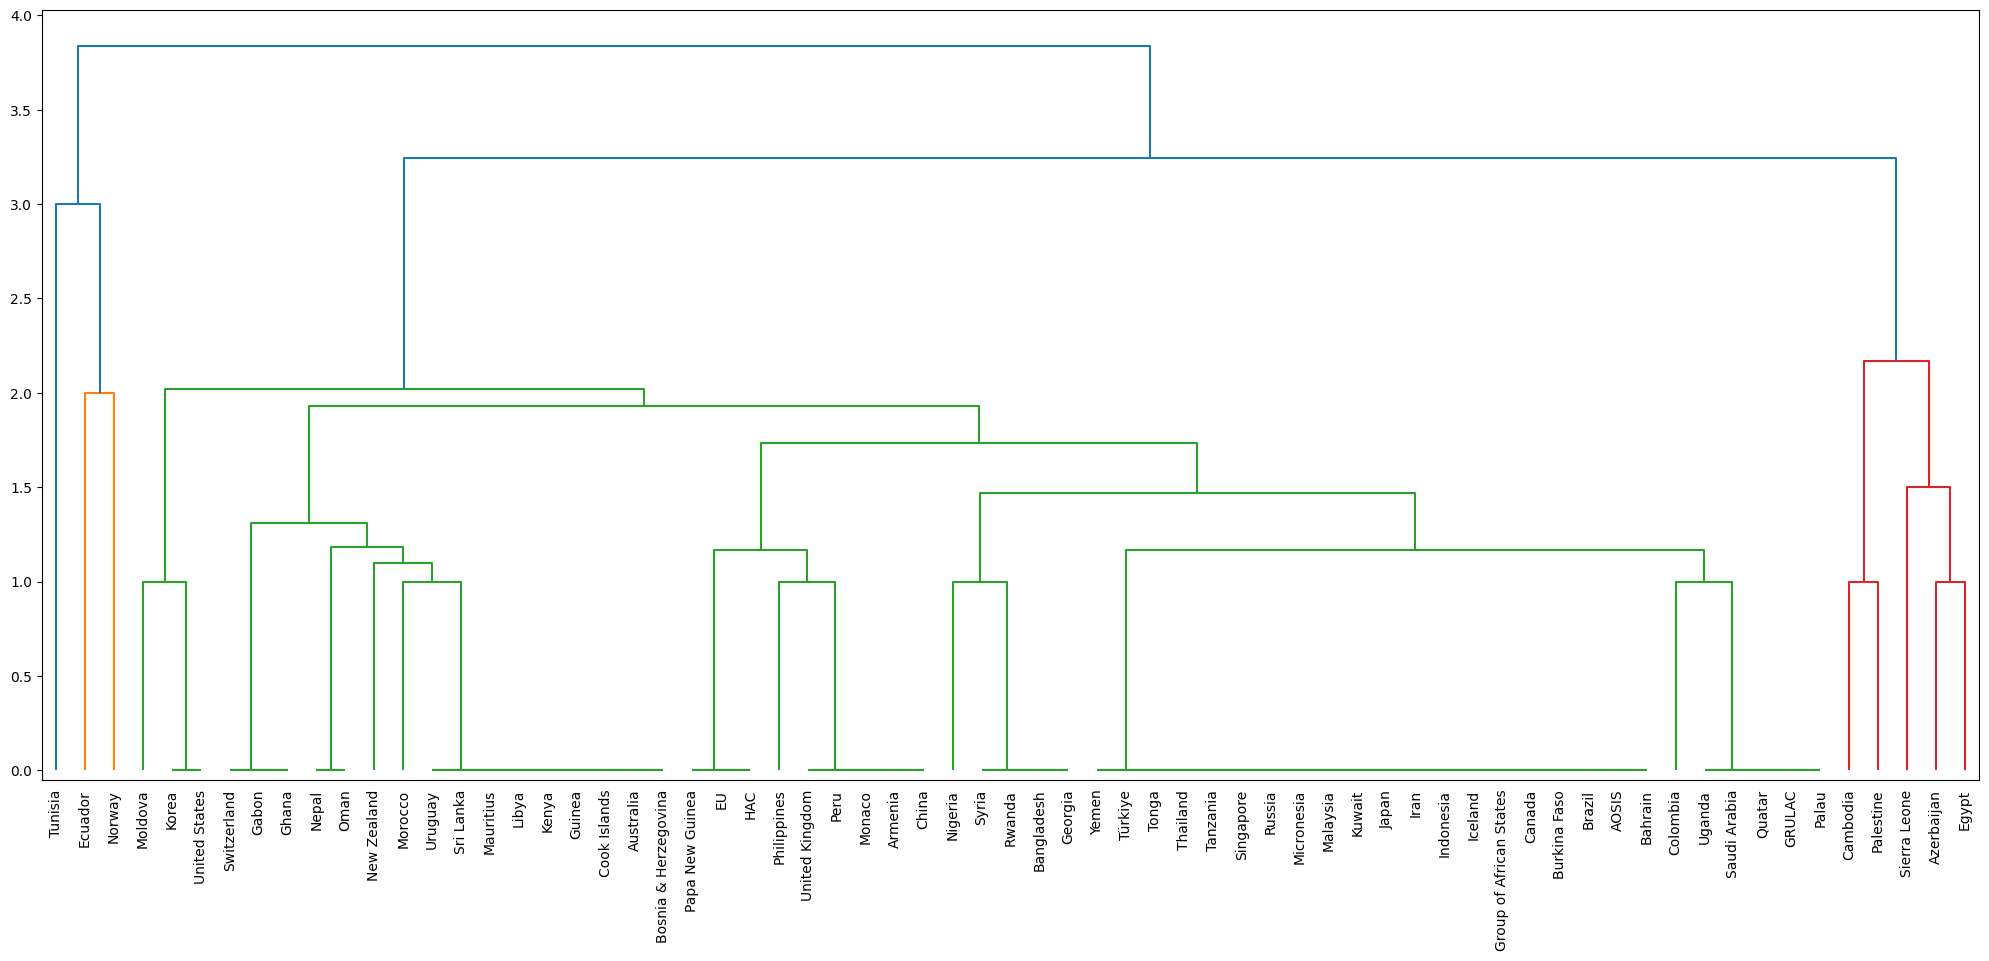

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectors, 'average', metric=manhattan_distance)
fig, ax = plt.subplots(1,1,figsize=(25, 10))

dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax)
#save figure
ax.set_ylim(-0.05)
fig.savefig('dendrogram_manhattan.png', bbox_inches='tight')
plt.show()

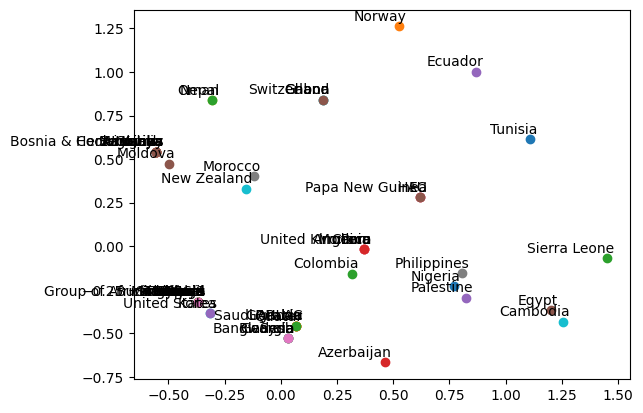

In [105]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

# label each point with its country
for i, country in enumerate(countries):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(country, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')